In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# EDA on Twitter dataset 
Hello and welcome to my Jupyter notebook.

What this does: given a `dataset_name`, saves to the `output_folder`. <u>This will overwrite the previous outputs</u>

Things to improve/play with (`# TODO`):
- **Improve/check the text tokenizer.** I haven't really checked if this works as expected. This affects: *wordclouds* (hashtags and tweet text), *topic extraction*
- **Improve the topic extraction.** I've used Latent Dirichlet Allocation (LDA) to extract topics. I haven't really played with the parameters yet. This affects: *topic extraction*
- **Include non-en tweets.** I've only included English tweets. This affects: *everything*
- **Include retweets.** I don't really know how retweets work in this dataset. This affects: *everything*

### Trying to understand the datasets:

Sorted by size (english tweets only):
- **catalonia_201906_1_tweets_csv_hashed**: Super small dataset on Catalonia's independence. Most tweets not in english.
- **bangladesh_linked_tweets_csv_hashed**: Bangladesh conflict, contains spam
- **iran_201906_3_tweets_csv_hashed**: Saudi Arabia, Trump, some brexit stuff
- **egypt_uae_082019_tweets_csv_hashed**: Qatar, Israel/Palestine conflict
- **iran_201901_1_tweets_csv_hashed_1**: Iran, Israel/Palestine conflict
- **ecuador_082019_tweets_csv_hashed**: mostly spam? maybe football stuff
- **iran_201901_1_tweets_csv_hashed_4**: Israel/Palestine
- **iranian_tweets_csv_hashed**: US/Iran conflict
- **china_082019_1_tweets_csv_hashed**: Mostly spam? Weird keywords
- **china_082019_2_tweets_csv_hashed**: Spam? Lot's of porn keywords
- **iran_201906_1_tweets_csv_hashed**: Intresting dataset! Spam, but also political stuff?
- **iran_201901_1_tweets_csv_hashed_2**: Also interesting. Same as above
- **iran_201901_1_tweets_csv_hashed_3**: Same as above
- **china_082019_3_tweets_csv_hashed_part1**:
- **china_082019_3_tweets_csv_hashed_part3**:
- **iran_201906_2_tweets_csv_hashed**:
- **china_082019_3_tweets_csv_hashed_part2**:
- **saudi_arabia_112019_tweets_csv_hashed_9**:
- **saudi_arabia_112019_tweets_csv_hashed_8**:
- **saudi_arabia_112019_tweets_csv_hashed_3**:
- **saudi_arabia_112019_tweets_csv_hashed_7**:
- **saudi_arabia_112019_tweets_csv_hashed_5**:
- **saudi_arabia_112019_tweets_csv_hashed_6**:
- **saudi_arabia_112019_tweets_csv_hashed_4**:
- **saudi_arabia_112019_tweets_csv_hashed_2**:
- **saudi_arabia_112019_tweets_csv_hashed_1**:
- **ira_tweets_csv_hashed**:

### Set up variables

In [2]:
dataset_name = 'china_082019_3_tweets_csv_hashed_part1'
output_folder = 'eda_output'
os.makedirs(output_folder, exist_ok=True)

## Loading the data

In [3]:
df = pd.read_csv(f'twitter_data/{dataset_name}.csv', low_memory=False)
df.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
0,968451802600525825,MI2VFTr7t2qJWnbXsEOWWtswIVei41lFaW8ZtXO40=,MI2VFTr7t2qJWnbXsEOWWtswIVei41lFaW8ZtXO40=,MI2VFTr7t2qJWnbXsEOWWtswIVei41lFaW8ZtXO40=,Pakistan,https://t.co/LoObW0Bfbz is Pakistan's No. 1 Ne...,https://t.co/d36sXtgFRh,2170,40,2015-08-04,...,absent,absent,0.0,0.0,0.0,0.0,[],['http://sachtimes.com/ur/kuKkc'],[],NaN
1,953904392993898496,MI2VFTr7t2qJWnbXsEOWWtswIVei41lFaW8ZtXO40=,MI2VFTr7t2qJWnbXsEOWWtswIVei41lFaW8ZtXO40=,MI2VFTr7t2qJWnbXsEOWWtswIVei41lFaW8ZtXO40=,Pakistan,https://t.co/LoObW0Bfbz is Pakistan's No. 1 Ne...,https://t.co/d36sXtgFRh,2170,40,2015-08-04,...,absent,absent,0.0,0.0,0.0,0.0,[],[],[],NaN
2,966607914432696320,MI2VFTr7t2qJWnbXsEOWWtswIVei41lFaW8ZtXO40=,MI2VFTr7t2qJWnbXsEOWWtswIVei41lFaW8ZtXO40=,MI2VFTr7t2qJWnbXsEOWWtswIVei41lFaW8ZtXO40=,Pakistan,https://t.co/LoObW0Bfbz is Pakistan's No. 1 Ne...,https://t.co/d36sXtgFRh,2170,40,2015-08-04,...,absent,absent,0.0,0.0,0.0,0.0,[],[],[],NaN
3,964842334209957889,MI2VFTr7t2qJWnbXsEOWWtswIVei41lFaW8ZtXO40=,MI2VFTr7t2qJWnbXsEOWWtswIVei41lFaW8ZtXO40=,MI2VFTr7t2qJWnbXsEOWWtswIVei41lFaW8ZtXO40=,Pakistan,https://t.co/LoObW0Bfbz is Pakistan's No. 1 Ne...,https://t.co/d36sXtgFRh,2170,40,2015-08-04,...,absent,absent,0.0,0.0,0.0,0.0,"['ImranKhan', 'PTI']",[],[628313960],NaN
4,964053661029752832,MI2VFTr7t2qJWnbXsEOWWtswIVei41lFaW8ZtXO40=,MI2VFTr7t2qJWnbXsEOWWtswIVei41lFaW8ZtXO40=,MI2VFTr7t2qJWnbXsEOWWtswIVei41lFaW8ZtXO40=,Pakistan,https://t.co/LoObW0Bfbz is Pakistan's No. 1 Ne...,https://t.co/d36sXtgFRh,2170,40,2015-08-04,...,absent,absent,0.0,0.0,0.0,0.0,"['Blast', 'Hangu']",[],[],NaN


In [4]:
# convert tweet_time and account_creation_date to datetime
df['tweet_time'] = pd.to_datetime(df['tweet_time'])
df['account_creation_date'] = pd.to_datetime(df['account_creation_date'])

## Language and Retweets

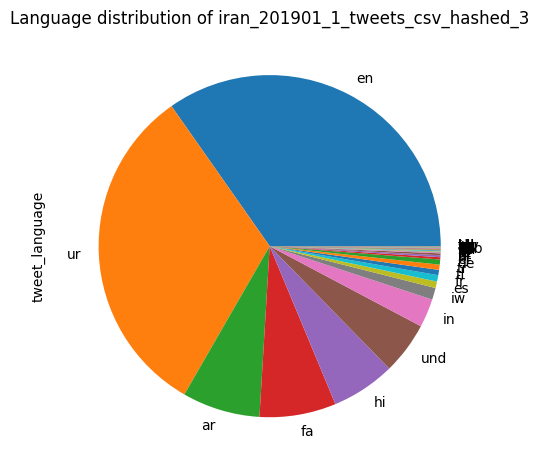

In [5]:
# show pie chart of tweet counts by language
df['tweet_language'].value_counts().plot.pie()
plt.title(f'Language distribution of {dataset_name}')
plt.tight_layout()
plt.savefig(f'{output_folder}/{dataset_name}_language_pie.png')
plt.show()

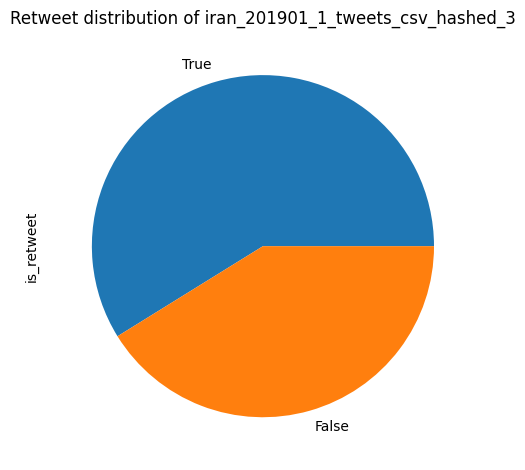

In [6]:
# show pie charts of retweet counts
df['is_retweet'].value_counts().plot.pie()
plt.title(f'Retweet distribution of {dataset_name}')
plt.tight_layout()
plt.show()

In [7]:
# TODO: See Introduction
df = df[df['tweet_language'] == 'en']
# haven't really explored retweets yet, so let's remove them for now
df = df[df['is_retweet'] == False]

## User profiles

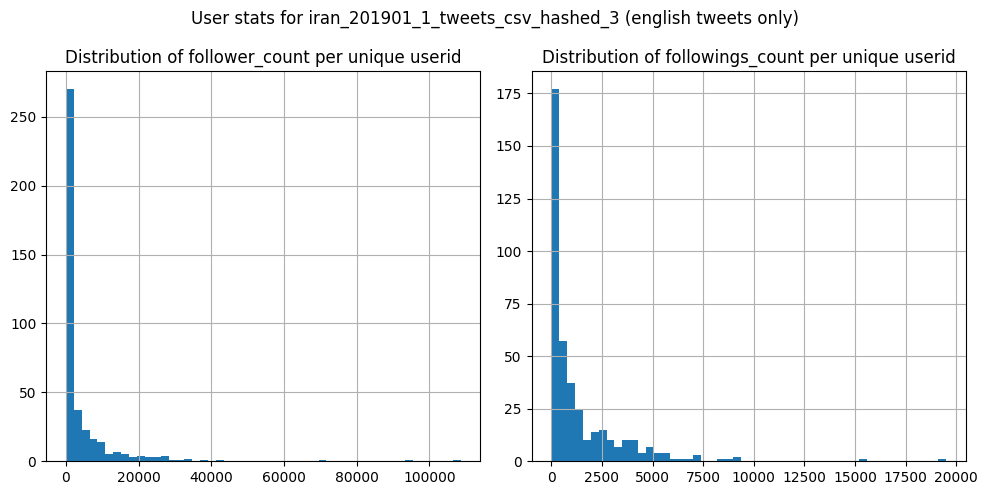

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
df.groupby('userid').follower_count.mean().hist(bins=50, ax=axes[0])
df.groupby('userid').following_count.mean().hist(bins=50, ax=axes[1])
axes[0].set_title('Distribution of follower_count per unique userid')
axes[1].set_title('Distribution of followings_count per unique userid')
fig.suptitle(f'User stats for {dataset_name} (english tweets only)')
plt.tight_layout()
plt.savefig(f'{output_folder}/{dataset_name}_user_stats.png')
plt.show()

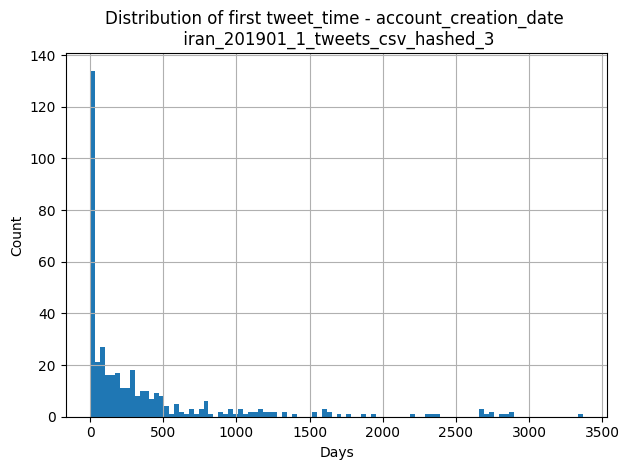

In [9]:
# show distribution of first tweet_time - account_creation_date
# group by userid and take the first tweet_time for each user

df.groupby('userid').tweet_time.min().sub(df.groupby('userid').account_creation_date.min(), axis=0).dt.days.hist(bins=100)
plt.title(f'Distribution of first tweet_time - account_creation_date \n {dataset_name}')
plt.xlabel('Days')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(f'{output_folder}/{dataset_name}_first_tweet_time_account_creation_date.png')
plt.show()

## Word clouds

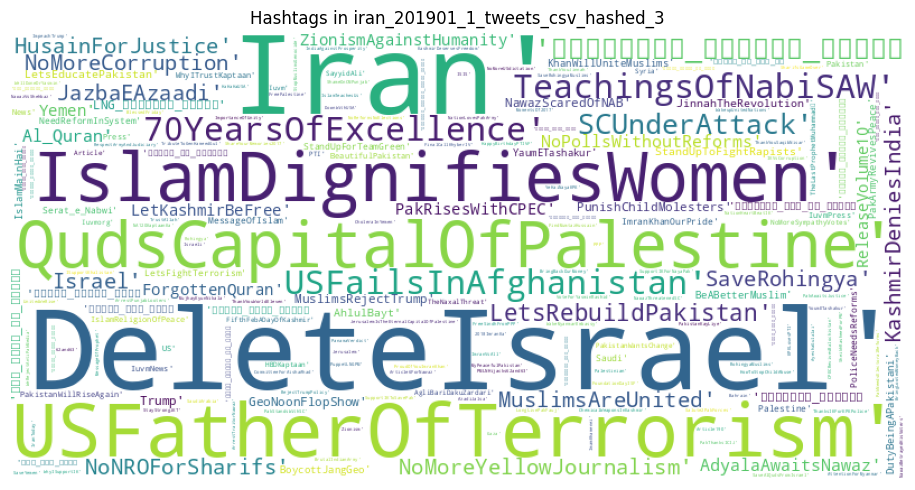

In [10]:
from wordcloud import WordCloud

hashtags = df['hashtags'].dropna().str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(hashtags)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title(f'Hashtags in {dataset_name}')
plt.tight_layout()
plt.savefig(f'{output_folder}/{dataset_name}_hashtags.png')
plt.show()

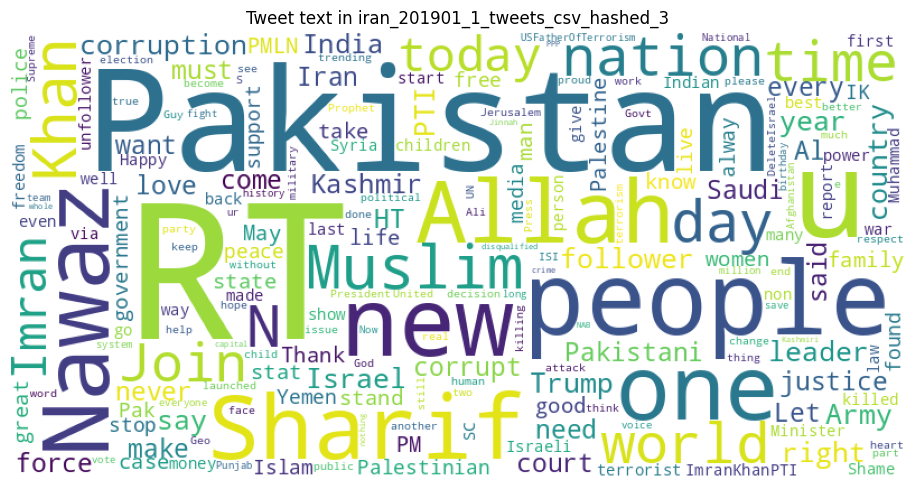

In [11]:
# do the same with tweet text, but remove stopwords
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer # TODO: See Introduction

stop_words = set(stopwords.words('english'))
stop_words.update(['https', 'co', 'amp', 't'])

# remove links and mentions
def remove_links_mentions(text):
    return ' '.join([w for w in text.split() if not w.startswith('http') and not w.startswith('@')])

def remove_stopwords(text):
    word_tokens = TweetTokenizer().tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

df['tweet_text_no_stopwords'] = df['tweet_text'].apply(remove_links_mentions).apply(remove_stopwords)

wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(df['tweet_text_no_stopwords'].str.cat(sep=' '))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title(f'Tweet text in {dataset_name}')
plt.tight_layout()
plt.savefig(f'{output_folder}/{dataset_name}_tweet_text.png')
plt.show()

## Random tweet samples
Note: this can crash for really small datasets

In [12]:
# print 10 random tweet_text
for t in df['tweet_text'].sample(10):
    print(t)
    print()

Read and Retweet
#PunishChildMolesters https://t.co/hYboutrRKM

Thanks for Justice
#عدلیہ_تیرا_شکریہ

#Syrian refugees stranded in #Greece: No More Waiting! https://t.co/wwaPioPid1

Wishing you happiness to welcome each morning, wishing you laughter to make your heart sing. Wishing you friendship sharing and caring, and all of the joy the Birthday can bring.
#HBDUmairSolangi

Join this HT.
#نااہل_کا_نظریہ

RT junaidkhan7600: Two great philosophies:
1. Ability can never remain hidden.
2. The birth of tension is the death of talent!

RT BHpti: #NoNROForSharifs  Hasan Nawaz Companies works with Jews Company, 2 directors of his cmpanies are Jews   #NoNROForSharifs

I do not have the fear of neither the faithful not polytheist about my Ummah. However, the faith of the faithful refrains him from harming the Ummah, more over the infidelity of the polytheist will become the cause of his abjectness &amp; repression.
#TheLastProphetMuhammadﷺ

today's stats : 1 new follower, 2 new unfollowers, 22

In [13]:
# manually look at outliers: accounts that have more than 200 followers, and have been created more than 1000 days before their first tweet

threshold = 1500
outliers = df.groupby('userid').tweet_time.min().sub(df.groupby('userid').account_creation_date.min(), axis=0).dt.days > threshold
# sample tweet_text for outliers
for t in df[df['userid'].isin(outliers[outliers].index)]['tweet_text'].sample(10):
    print(t)
    print()

Yemen’s army backed by fierce Houthis' fighters ambush  7 armored vehicles in 2 provinces https://t.co/5291UUI2d0

People in Rohingya r human too!
 #StopMuslimsGenocide

Nigerian Shia cleric Zakzaky makes first public appearance since detention in 2015 https://t.co/01K5l3RqSW

Nawaz Sharif &amp; PMLN should feel ashamed while teaching us the lesson of democracy as they are born in the lap of a dictator ZIA ul Haq!!
 #ضیاء_کا_لاڈلا_نواز

It’s not that
some peoples
have will power
and
some don’t

it’s that
Some people
are ready to
change
and
others are not..!

 #PunishChildMolesters

Gaza is Partly Cloudy today! With a high of 22 C and a low of 12 C and a chance of bomb showers from Israel! https://t.co/CDKq5JQEzQ

#Iranian teacher visits his student who suffers from cancer, every day to teach him the lessons he missed because of his absence from school 

#Iran 
#IranianHeroes https://t.co/M8qhaHGOAS

Prime Minister Narendra Modi and US President Donald Trump are likely to have a bilater

In [14]:
# find all tweet_text_no_stopwords that contain 'http'
df[df['tweet_text_no_stopwords'].str.contains('http')]['tweet_text_no_stopwords'].sample(10)

120979     Omran : Mass rally denounce declaration Jerusa...
1685419    Our missiles aimed US Southern brethren : N Ko...
60457      #ShiekhQaisKhazali : Closure US embassy least ...
53603      Amnesty International urges probe Myanmar ’ Ar...
179769     Deutsche Bank flags ‘ suspicious transactions ...
906829     Israeli MP harasses Palestinian women , shouts...
1773315    UN ’ Iran meeting another blow US unilateralis...
799565     US cabinet members plotting remove Trump : htt...
1640545    History teaches us blindly trust US : Pakistan...
280821     Death Confession : Civilians tortured Bahrain ...
Name: tweet_text_no_stopwords, dtype: object

## Topic Extraction

In [15]:
df.shape[0] * 0.01

1083.42

In [16]:
# Topic extraction with LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# ignore words that are in less than 1% of tweets
min_df = int(df.shape[0] * 0.01)
cv = CountVectorizer(max_df=0.95, min_df=min_df, stop_words='english')
dtm = cv.fit_transform(df['tweet_text_no_stopwords'].dropna())

# fit LDA model
# TODO: see Introduction
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# show metrics
print(f'Log likelihood: {lda.score(dtm)}')
print(f'Perplexity: {lda.perplexity(dtm)}')


Log likelihood: -822095.6980353531
Perplexity: 70.70725692056797


In [17]:

for idx, topic in enumerate(lda.components_):
    print(f'Top 7 words for topic #{idx}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-7:]])
    print()

Top 7 words for topic #0
['stats', 'man', 'muslim', 'justice', 'followers', 'today', 'new']

Top 7 words for topic #1
['country', 'ht', 'pti', 'trump', 'time', 'join', 'rt']

Top 7 words for topic #2
['pakistani', 'great', 'government', 'ns', 'rt', 'people', 'pakistan']

Top 7 words for topic #3
['court', 'army', 'imran', 'khan', 'sharif', 'rt', 'nawaz']

Top 7 words for topic #4
['day', 'love', 'like', 'kashmir', 'israel', 'world', 'allah']



In [18]:
# give each topic a name with the 3 most common words

topic_names = [', '.join([cv.get_feature_names_out()[i] for i in topic.argsort()[-3:]]) for topic in lda.components_]
topic_names

['followers, today, new',
 'time, join, rt',
 'rt, people, pakistan',
 'sharif, rt, nawaz',
 'israel, world, allah']

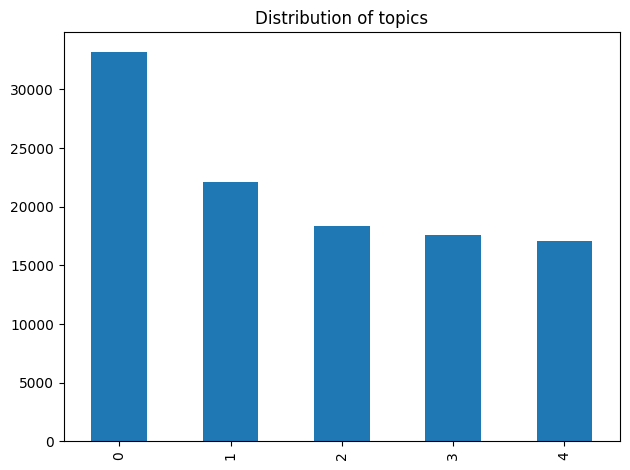

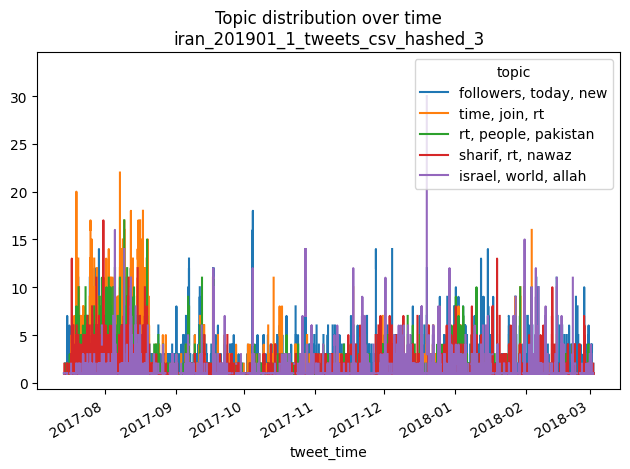

In [19]:

# show distribution of topics for each tweet
topic_results = lda.transform(dtm)
df['topic'] = topic_results.argmax(axis=1)
df['topic'].value_counts().plot.bar()
plt.title('Distribution of topics')
plt.tight_layout()
plt.show()

# show trend of topics over time
df.groupby('tweet_time').topic.value_counts().unstack().rename(columns=dict(zip(range(5), topic_names))).plot()
plt.title(f'Topic distribution over time\n{dataset_name}')
plt.tight_layout()
plt.savefig(f'{output_folder}/{dataset_name}_topic_distribution_over_time.png')
plt.show()
